In [1]:
import pandas as pd
import numpy as np
from numpy import random
from scipy import stats
import matplotlib.pyplot as plt
from pylab import *
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

<b><i>Steps of data analysis</i></b>
<ul><li>Ask questions</li>
<li>Wrangle<ul><li>Data acquisition</li><li>Data cleaning</li></ul></li>
<li>Exploration</li>
<li>Draw Conclution</li>
<li>Communicate</li>
</ul>

In [2]:
#I need to follow these steps:
# Check Data: Load data. Go through it. Understand what is it about?  
# How many variables are there?
# What kind of questions it posses?
# Does it require cleaning? 
# How can I explore the data?
# How can I communicate what I find?

In [3]:
# Lets load the data and have a look

In [4]:
ls

2D_numpy_arrays_and_dataframes.ipynb   enrollments.csv
Cluster_chart.ipynb                    female_completion_rate.csv
Data_exploration_practise.ipynb        gdp_per_capita.csv
Numpy_and_Pandas_for_1D_data.ipynb     life_expectancy.csv
Titanic_data_project_3_practise.ipynb  male_completion_rate.csv
Untitled.ipynb                         matches.csv*
daily_engagement.csv                   numpy_pandas_cheatsheet.pdf
daily_engagement_full.csv              nyc_subway_weather.csv
data_analysis_practise.ipynb           nyc_subway_weather_descriptions.pdf
deliveries.csv*                        project_submissions.csv
employment_above_15.csv                train.csv


In [2]:
# load dataset
titanic_dataset = pd.read_csv("train.csv")

In [3]:
# Preview the first 5 rows
titanic_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Preview the last 5 rows
titanic_dataset.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
# creating an explainer dataframe that defines the variables available in the dataset.
definitions = pd.DataFrame({"Variable":["Survival", "pClass","Sex","Age","Sibsp", "Parch", "Ticket", "Fare", "Cabin", "Embarked"],
                         "Definition":["Survival (0 = No, 1 = Yes)", "Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)", "Sex", "Age in years", "# of siblings / spouses aboard the Titanic",
                                      "# of parents / children aboard the Titanic", "Ticket number", "Passenger fare", "Cabin number",
                                      "Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)"]})
# change order of the dataframe columns
ordered_df = definitions[["Variable", "Definition"]]
ordered_df

,Variable,Definition
0,Survival,"Survival (0 = No, 1 = Yes)"
1,pClass,"Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)"
2,Sex,Sex
3,Age,Age in years
4,Sibsp,# of siblings / spouses aboard the Titanic
5,Parch,# of parents / children aboard the Titanic
6,Ticket,Ticket number
7,Fare,Passenger fare
8,Cabin,Cabin number
9,Embarked,"Port of Embarkation (C = Cherbourg, Q = Queens..."


<i>Survival: 0 = No, 1 = Yes</i><br>
<i>Ticket class: 1 = 1st, 2 = 2nd, 3 = 3rd</i><br>
<i>Port of Embarkation: C = Cherbourg, Q = Queenstown, S = Southampton</i>

<b>Variable Notes</b>

<i>pclass: A proxy for socio-economic status (SES)</i>
<i>1st = Upper</i>
<i>2nd = Middle</i>
<i>3rd = Lower</i>

<i>age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5</i>

<i>sibsp: The dataset defines family relations in this way...</i>
<i>Sibling = brother, sister, stepbrother, stepsister</i>
<i>Spouse = husband, wife (mistresses and fiancés were ignored)</i>

<i>parch: The dataset defines family relations in this way...</i>
<i>Parent = mother, father</i>
<i>Child = daughter, son, stepdaughter, stepson</i>
<i>Some children travelled only with a nanny, therefore parch=0 for them.</i>

<ul><b><i>Here are some obvious questions coming to mind:</i></b>
<li><i>What was the death toll of passengers aboard Titanic?</i></li>
<li><i>How many passengers survived?</i></li>
<li><i>What was the ratio of survivers to non survivers?</i></li>
<li><i>What was female to male ratio of passengers who died?</i></li>
<li><i>What was the female to male surviver ratio?</i></li>
<li><i>How many passengers where travelling with siblings or spouses? How many died? How many survived?</i></li>
<li><i>How many parents and childeren were on board? How many died? How many survived?</i></li>
<li><i>What was ratio of passengers travelling in 1st, 2nd and 3rd class</i></li>
<li><i>How many passanger died and survived in each class?</i></li>
<li><i>What was the ratio of passengers on the basis of their port of embarkation?</i></li>
<li><i>What kind of correlations can be established?</i></li></ul>

In [6]:
# All the available variables in the dataset
print(list(titanic_dataset))

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [7]:
# Basic index and column information
titanic_dataset.shape
# There are 891 rows and 12 columns.

(891, 12)

In [8]:
# dataset at a glance.
titanic_dataset.info() 
# An overview of the dataset showing column names and number of rows
# in each column. Also shows missing values in the dataset and data types.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [9]:
# Check for missing values in each column
titanic_dataset.isnull().sum()
# Columns Age, Cabin and Embarked show missing values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<b>Missing Data</b>

In [10]:
# Check what percent of data values are missing. 
def missing_data(dataset):
    """Returns percentage of missing value from a dataset"""
    missing = round(dataset.isnull().sum()/len(dataset),4)
    return missing * 100
print("+"+" -"* 28 +" +")
print("| "+" Age data of {}% passengers is missing.".format(round(missing_data(titanic_dataset["Age"]))) + " " * 15 + "|") 
print("+"+" -"* 28 +" +")
print("| "+" Cabin data of {}% passengers is missing.".format(round(missing_data(titanic_dataset["Cabin"]))) + " " * 13 + "|")     
print("+"+" -"* 28 +" +")
print("| "+" Embarked data of {}% passengers is missing.".format(missing_data(titanic_dataset["Embarked"])) + " " * 10 + "|")     
print("+"+" -"* 28 +" +")

+ - - - - - - - - - - - - - - - - - - - - - - - - - - - - +
|  Age data of 20.0% passengers is missing.               |
+ - - - - - - - - - - - - - - - - - - - - - - - - - - - - +
|  Cabin data of 77.0% passengers is missing.             |
+ - - - - - - - - - - - - - - - - - - - - - - - - - - - - +
|  Embarked data of 0.22% passengers is missing.          |
+ - - - - - - - - - - - - - - - - - - - - - - - - - - - - +


<i> From the entire roster of 2224 passengers and crew members on board the Titanic, only 40% information is available. Out of that, values are missing within that data as well. However, we will try to fix these missing values later in the analysis.</i>

<i>For the time being, lets answer some straight forawrd questions about the information we have:</i><br> 
<b><i>Of all on board, how many souls survived and how many were lost?</i></b><br>
<b><i>Out of those who survived, how many were women and how many were men?</i></b>

In [11]:
# No. of survivors and non-survivors of the incident
total_survived = titanic_dataset["Survived"].sum() # sum of rows
total_deceased = len(titanic_dataset["Survived"]) - total_survived
print("+"+" -"* 22 +"  +")
print("| "+"Out of {} passengers, {} survived {} died".format(len(titanic_dataset), total_survived, total_deceased) + " |")   
print("+"+" -"* 22 +"  +")

+ - - - - - - - - - - - - - - - - - - - - - -  +
| Out of 891 passengers, 342 survived 549 died |
+ - - - - - - - - - - - - - - - - - - - - - -  +


In [12]:
# grouping the dataframe by gender. 
groupby_sex = titanic_dataset.groupby("Sex").describe()

In [13]:
# access the female column of grouped dataframe
female_passengers = groupby_sex.transpose()["female"]
print("+"+" -"* 28 +" +")
print("|" + " Number of Female passangers on board the Titanic: {}".format(female_passengers.loc["PassengerId", "count"]) + " |")
print("+"+" -"* 28 +" +")

+ - - - - - - - - - - - - - - - - - - - - - - - - - - - - +
| Number of Female passangers on board the Titanic: 314.0 |
+ - - - - - - - - - - - - - - - - - - - - - - - - - - - - +


In [14]:
# access the male column of grouped dataframe
male_passengers = groupby_sex.transpose()["male"]
print("+"+" -"* 28 +" +")
print("|" + " Number of Male passenges on board the Titanic: {}".format(male_passengers.loc["PassengerId", "count"])+ "    |")    
print("+"+" -"* 28 +" +")


+ - - - - - - - - - - - - - - - - - - - - - - - - - - - - +
| Number of Male passenges on board the Titanic: 577.0    |
+ - - - - - - - - - - - - - - - - - - - - - - - - - - - - +


In [15]:
# check gender wise survivors
survival_by_gender = titanic_dataset.groupby("Sex")["Survived"].sum() # sum of all who survived in dataframe grouped by sex     
female_survivors = survival_by_gender.loc["female"]
print("+"+" -"* 28 +" +")
print("|" + " Number of female suvivors {}".format(female_survivors)+ " " * 27 + "|")
male_survivors = survival_by_gender.loc["male"]
print("|" +" Number of male survivors {}".format(male_survivors)+ " " * 28 + "|")
print("+"+" -"* 28 +" +")

+ - - - - - - - - - - - - - - - - - - - - - - - - - - - - +
| Number of female suvivors 233                           |
| Number of male survivors 109                            |
+ - - - - - - - - - - - - - - - - - - - - - - - - - - - - +


In [16]:
# check count of children, single woman, women and men from the  
Boys, Girls, Women, Men, Others = 0, 0, 0, 0, 0
for i in titanic_dataset[titanic_dataset["Survived"] == 1]["Name"]:
    if "Master." in i:
        Boys+=1
    elif "Miss." in i:
        Girls+=1
    elif "Mrs." in i:
        Women+=1
    elif "Mr." in i:
        Men+=1
    else:
        Others+=1
total_survivors = [Girls, Boys, Women, Men, Others]
print("+"+" -"* 28 +" +")
print(" Total number of survivors include:\n {} girls\n {} boys\n {} women\n {} men\n {} others".format(Girls, Boys, Women, Men, Others))
print()
print(" Others include:\n Dr., Countess., Mme., Lady., Major., Col., Mlle. Sir.")
print("+"+" -"* 28 +" +")

+ - - - - - - - - - - - - - - - - - - - - - - - - - - - - +
 Total number of survivors include:
 127 girls
 23 boys
 99 women
 81 men
 12 others

 Others include:
 Dr., Countess., Mme., Lady., Major., Col., Mlle. Sir.
+ - - - - - - - - - - - - - - - - - - - - - - - - - - - - +


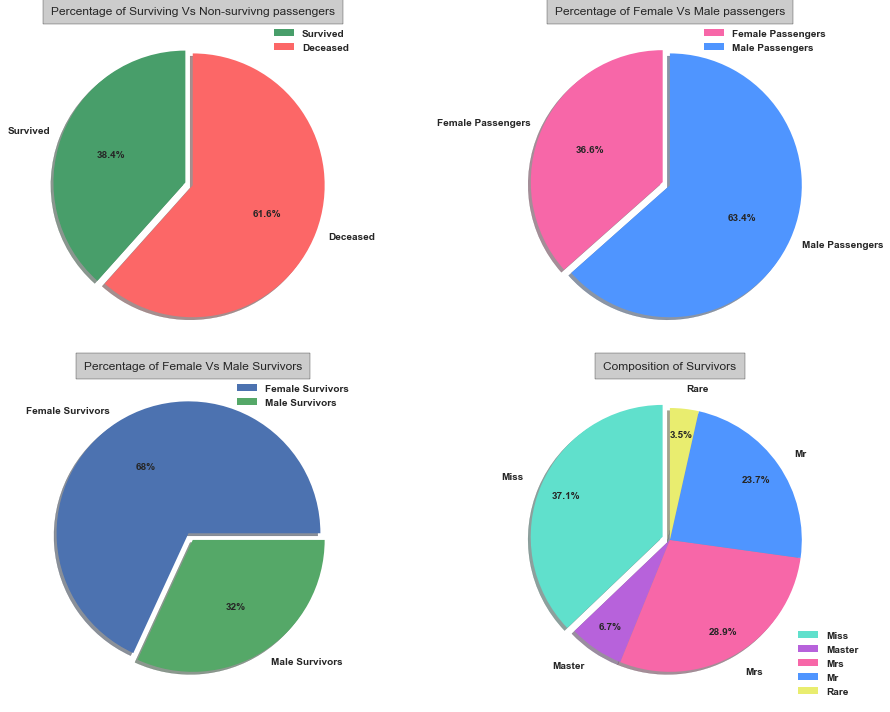

In [17]:
# set typeface, weight, typesize for labels and legends
font = {'family' : 'arial',
        'weight' : 'bold',
        'size'   : 10}

matplotlib.rc('font', **font)

# set labels, explode, color
labels = 'Miss Master Mrs Mr Rare'.split()
explode = (0.06, 0, 0, 0, 0)
color_list = ["#60e0cc", "#b762db", "#f767a8", "#4f95ff", "#e9ed6f"]

# Make square figures and axes
fig = plt.figure(figsize=(15,10))
the_grid = GridSpec(2, 2)

# plot surviving vs non surving passengers
plt.subplot(the_grid[0, 0], aspect=1)
plt.pie([total_survived, total_deceased], explode=[0.06, 0], labels=["Survived", "Deceased"], colors=["#489e6a","#fc6767"], 
        autopct='%1.1f%%', shadow=True, startangle=90)
title('Percentage of Surviving Vs Non-survivng passengers', bbox={'facecolor':'0.8', 'pad':8})
plt.legend(loc="upper right")

# plot female vs male survivors
plt.subplot(the_grid[0, 1], aspect=1)
plt.pie([female_passengers.loc["Age", "count"],male_passengers.loc["Age", "count"]], 
        explode=[0.06, 0], labels=["Female Passengers", "Male Passengers"],colors=["#f767a8","#4f95ff"], autopct='%1.1f%%', shadow=True 
        ,startangle=90)
title('Percentage of Female Vs Male passengers', bbox={'facecolor':'0.8', 'pad':8})
plt.legend(loc="upper right")

# plot female survivors Vs male survivors
plt.subplot(the_grid[1, 0], aspect=1)
plt.pie([female_survivors, male_survivors], explode=[0.06, 0] ,labels=["Female Survivors", "Male Survivors"], autopct='%.0f%%', shadow=True, labeldistance=1.1)
title('Percentage of Female Vs Male Survivors', bbox={'facecolor':'0.8', 'pad':8})
plt.legend(loc="upper right")

# plot composition of survivors
plt.subplot(the_grid[1, 1], aspect=1)
plt.pie(total_survivors,labels=labels, colors=color_list, explode = explode, autopct='%1.1f%%', pctdistance=0.8, shadow=True 
        ,startangle=90, labeldistance=1.15)
title('Composition of Survivors', bbox={'facecolor':'0.8', 'pad':8})
plt.legend(loc="lower right", bbox_to_anchor=(1.1, 0))

plt.tight_layout()


<h3 fp style="font-size:14px"><i>Almost 62% passengers lost their lives in the incident. 38% survived.</i></h3>
<h3 fp style="font-size:14px"><i>Out of 891 passenger, about 36% (314) were female and about 64% (577) were males. Number of female suvivors were 233 while number of male survivors 109 </i></h3>

<b><i>AGE:</i></b><br>
Let's start working with age. First, lets start by substituting those missing values with random ages. 

In [18]:
# replacing missing values with random age. To do so, average, std, and number of null values in titanic_dataset["Age"] is needed
mean_age_of_passengers = titanic_dataset["Age"].mean()
std_age_of_passengers = titanic_dataset["Age"].std()
missing_age_of_passengers = titanic_dataset["Age"].isnull().sum()
(mean_age_of_passengers, std_age_of_passengers, missing_age_of_passengers)
#generate random numbers between (mean - std) & (mean + std)
random_age = np.random.randint(mean_age_of_passengers - std_age_of_passengers, mean_age_of_passengers + std_age_of_passengers, size=missing_age_of_passengers)
titanic_dataset['Age'].dropna().astype(int)
#fill NaN values in Age column with random values generated
titanic_dataset["Age"][np.isnan(titanic_dataset["Age"])] = random_age
# Quick overview of measures of central tendancy and variance.
titanic_dataset["Age"].describe()

//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


count    891.000000
mean      29.676958
std       13.504443
min        0.420000
25%       21.000000
50%       29.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

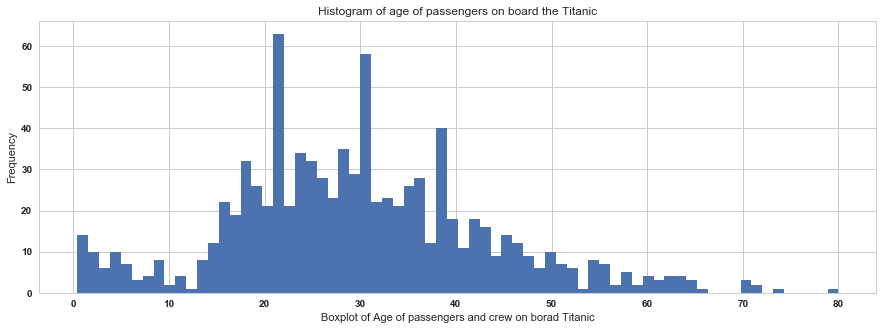

In [19]:
# Plotting a histogram to see the distribution of ages of total number of passengers on board.
plt.subplots(1, figsize=(15,5))
plt.hist(titanic_dataset["Age"],bins=70)
plt.xlabel("Boxplot of Age of passengers and crew on borad Titanic")
plt.ylabel("Frequency")
plt.title("Histogram of age of passengers on board the Titanic")

#plt.subplots(1, figsize=(15,5))
#sns.boxplot(titanic_dataset["Age"],color="#ffd26b")

<i>After replacing the missing ages with the average age of the passengers the data gave a count of 891 passengers with a mean age of 29.54 years and standard deviation of 13.43 years. A passengers' minimum age was 0.42 years and maximum age was 80 years. Median age was 28.00 years.</i>

In [20]:
# group dataframe by Survived and check statistics of survivors vs non survivors
print(titanic_dataset.groupby("Survived")["Age"].describe())

Survived       
0         count    549.000000
          mean      30.330601
          std       13.083759
          min        1.000000
          25%       21.000000
          50%       28.500000
          75%       38.000000
          max       74.000000
1         count    342.000000
          mean      28.627690
          std       14.109850
          min        0.420000
          25%       20.000000
          50%       29.000000
          75%       36.750000
          max       80.000000
Name: Age, dtype: float64


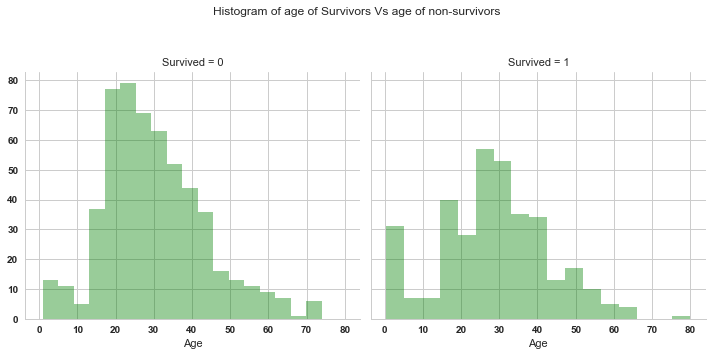

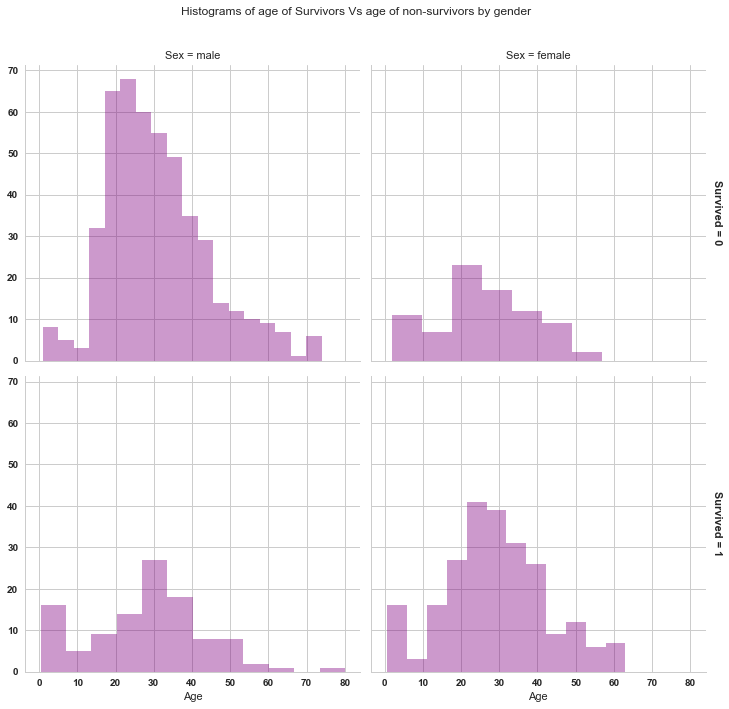

In [21]:
g = sns.FacetGrid(titanic_dataset, col='Survived',size=5, aspect=1)
g.map(sns.distplot, "Age", hist=True, kde=False, color="green")
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Histogram of age of Survivors Vs age of non-survivors')

g = sns.FacetGrid(titanic_dataset, col="Sex", row="Survived", size= 5, aspect=1, margin_titles=True)
g.map(sns.distplot, "Age", hist=True, kde=False, color="purple")
plt.subplots_adjust(top=.9)
g.fig.suptitle('Histograms of age of Survivors Vs age of non-survivors by gender')

<b><i>What was the average age of females and males who died in the incident?</i></b> 

      Sex  Survived        Age
0  female  0.742038  28.289809
1    male  0.188908  30.431837


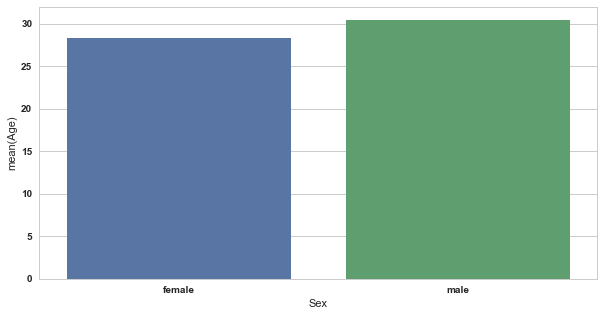

In [22]:
describe = titanic_dataset[["Survived", "Sex", "Age"]].groupby(["Sex"], as_index=False).mean()
print(describe)
describe.drop("Survived", axis=1)
plt.subplots(1, figsize=(10, 5))
sns.barplot(x="Sex", y="Age", data=describe.drop("Survived", axis=1))

In [23]:
print(titanic_dataset.groupby("Survived")["Age"].mean())

Survived
0    30.330601
1    28.627690
Name: Age, dtype: float64


In [24]:
#print("Names of those who survived: {}".format(titanic_dataset[titanic_dataset["Survived"] == 1]["Name"]))

In [25]:
children_age = []
miss_age = []
mrs_age = []
mr_age = []
for i in range(len(titanic_dataset[titanic_dataset["Survived"] == 1]["Name"])):
    if "Master" in titanic_dataset[titanic_dataset["Survived"] == 1]["Name"].iloc[i]:
        children_age.append(titanic_dataset["Age"].iloc[i])
    elif "Miss" in titanic_dataset[titanic_dataset["Survived"] == 1]["Name"].iloc[i]:
        miss_age.append(titanic_dataset["Age"].iloc[i])
    elif "Mrs" in titanic_dataset[titanic_dataset["Survived"] == 1]["Name"].iloc[i]:
        mrs_age.append(titanic_dataset["Age"].iloc[i])
    else:
        mr_age.append(titanic_dataset["Age"].iloc[i])

In [26]:
len(miss_age)

127

In [27]:
len(children_age)

23

In [28]:
len(mrs_age)

101

In [29]:
len(mr_age)

91

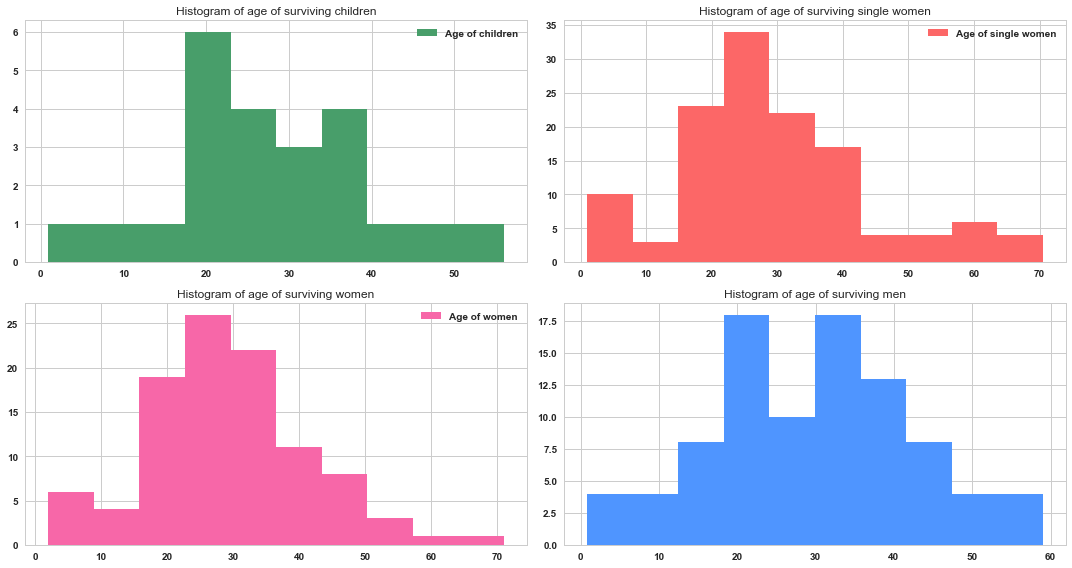

In [30]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,8))
ax0, ax1, ax2, ax3 = axes.flatten()
ax0.hist(children_age, 10, histtype='bar', color="#489e6a", label="Age of children")
ax0.legend(prop={'size': 10})
ax0.set_title('Histogram of age of surviving children')


ax1.hist(miss_age, 10, histtype='bar',color="#fc6767", label="Age of single women")
ax1.legend(loc="upper right")
ax1.set_title('Histogram of age of surviving single women')


ax2.hist(mrs_age, 10, histtype='bar', color="#f767a8", label="Age of women")
ax2.legend(loc="upper right")
ax2.set_title('Histogram of age of surviving women')

ax3.hist(mr_age, 10, histtype='bar', color="#4f95ff", label="Age of men")
ax2.legend(loc="upper right")
ax3.set_title('Histogram of age of surviving men')

fig.tight_layout()


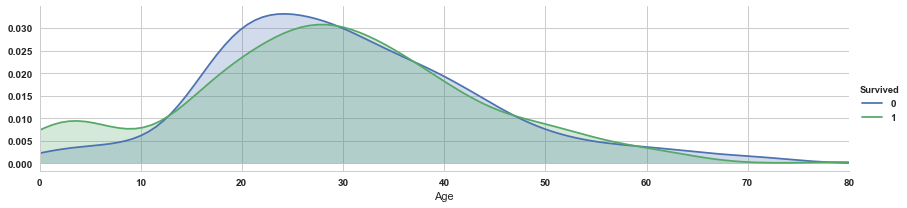

In [31]:
# .... continue with plot Age column
# peaks for survived/not survived passengers by their age
facet = sns.FacetGrid(titanic_dataset, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, titanic_dataset['Age'].max()))
facet.add_legend()
#plt.subplots(1, figsize=(15,5))
#sns.boxplot(data=[children_age, miss_age, mrs_age, mr_age])

In [32]:
data = titanic_dataset[["Survived", "Sex"]].groupby("Sex").sum()

In [33]:
data

,Survived
Sex,
female,233
male,109


In [34]:
"Mme", "Major", 

('Mme', 'Major')

In [35]:
unknown_suvivors = []
for i in titanic_dataset[titanic_dataset["Survived"] == 1]["Name"]:
    if "Master" not in i and "Miss" not in i and "Mr." not in i and "Mrs." not in i:
        unknown_suvivors.append(i)

In [36]:
len(unknown_suvivors)
unknown_suvivors

['Aubart, Mme. Leontine Pauline',
 'Reynaldo, Ms. Encarnacion',
 'Peuchen, Major. Arthur Godfrey',
 'Duff Gordon, Lady. (Lucille Christiana Sutherland) ("Mrs Morgan")',
 'Duff Gordon, Sir. Cosmo Edmund ("Mr Morgan")',
 'Stahelin-Maeglin, Dr. Max',
 'Sagesser, Mlle. Emma',
 'Simonius-Blumer, Col. Oberst Alfons',
 'Frauenthal, Dr. Henry William',
 'Mayne, Mlle. Berthe Antonine ("Mrs de Villiers")',
 'Rothes, the Countess. of (Lucy Noel Martha Dyer-Edwards)',
 'Leader, Dr. Alice (Farnham)']

In [37]:
"Master. Miss. Mrs. Mr.".split()

['Master.', 'Miss.', 'Mrs.', 'Mr.']

In [38]:
titanic_dataset[["SibSp", "Parch", "Survived", "Sex"]].groupby("Sex").sum()

,SibSp,Parch,Survived
Sex,,,
female,218,204,233
male,248,136,109


In [39]:
titanic_dataset[["SibSp", "Parch", "Sex"]].groupby("Sex").sum()

,SibSp,Parch
Sex,,
female,218,204
male,248,136


In [40]:
titanic_dataset[["SibSp", "Parch", "Survived"]].groupby("Survived").sum()

,SibSp,Parch
Survived,,
0,304,181
1,162,159


In [41]:
# total number of sibblings/Spouses and parents/children on board
titanic_dataset[["SibSp", "Parch"]].sum()

SibSp    466
Parch    340
dtype: int64

In [42]:
#list(titanic_dataset[["Name","SibSp", "Parch"]].groupby("Name"))

In [43]:
 print(titanic_dataset[titanic_dataset[["SibSp", "Parch"]]==0][["SibSp", "Parch"]].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 2 columns):
SibSp    608 non-null float64
Parch    678 non-null float64
dtypes: float64(2)
memory usage: 14.0 KB
None


In [44]:
print(titanic_dataset[titanic_dataset[["SibSp", "Parch"]]==0][["SibSp", "Parch"]].isnull().sum())

SibSp    283
Parch    213
dtype: int64


In [45]:
count = 0
for i in titanic_dataset[titanic_dataset["SibSp"]==0]["SibSp"]:
    if i == 0.0:
        count += 1
print(count)        

608


In [46]:
count = 0
for i in titanic_dataset[titanic_dataset["Parch"]==0]["Parch"]:
    if i == 0.0:
        count +=1
print(count)

678


In [47]:
titanic_dataset[titanic_dataset[["SibSp", "Parch"]]==0][["SibSp", "Parch"]].iloc[0]

SibSp    NaN
Parch    0.0
Name: 0, dtype: float64

In [48]:
#for i in range(len(titanic_dataset["SibSp"])):
    #if titanic_dataset["SibSp"].iloc[i] == 0 and titanic_dataset["Parch"].iloc[i] == 0:
        #print(titanic_dataset["Name"].iloc[i], titanic_dataset["SibSp"].iloc[i], titanic_dataset["Parch"].iloc[i])

In [49]:
# 537 passengers had no Siblings/Spouses and Parents/children connection
# 163 passengers with no Siblings/Spouses and Parents/children survived
# 374 passengers with no Siblings/Spouses and Parents/hildren deceased

In [50]:
null = titanic_dataset[titanic_dataset[["SibSp", "Parch"]]==0][["SibSp", "Parch"]].isnull().sum()   
print(null)

SibSp    283
Parch    213
dtype: int64


In [51]:
#demo_passengers_with_SibSp = {'Name': [], 'SibSp': []}
#demo_Single_passengers = {"Name" : [], "SibSp": []}
#count_SibSp = 0
#count_non_SibSp = 0
#for i in range(len(titanic_dataset)):
        #if titanic_dataset["SibSp"].iloc[i] > 0:
            #count_SibSp += 1
            #demo_passengers_with_SibSp["Name"].append(titanic_dataset["Name"].iloc[i])
            #demo_passengers_with_SibSp["SibSp"].append(titanic_dataset["SibSp"].iloc[i])
        #else:
            #count_non_SibSp += 1
            #demo_Single_passengers["Name"].append(titanic_dataset["Name"].iloc[i])
            #demo_Single_passengers["SibSp"].append(titanic_dataset["SibSp"].iloc[i])
        #print(n_items = take(5, df.iteritems()))
#print(pd.DataFrame(demo_passengers_with_SibSp).head()) 
#print(pd.DataFrame(demo_Single_passengers).head())
#print(count_SibSp)
#print(count_non_SibSp)

In [52]:
#demo_SibSp_Parch_connection = {'Name': [], 'SibSp': [], "Parch":[]}
#demo_no_SibSp_Parch_connection = {'Name': [], 'SibSp': [], "Parch":[]}
#demo_atleast_one_SibSp = {"Name": [], "SibSp": [], "Parch": []}
#demo_atleast_one_Parch = {"Name": [], "SibSp": [], "Parch": []}
#demo_more_than_one_SibSp = {"Name": [], "SibSp": [], "Parch": []}
#demo_more_than_one_Parch = {"Name": [], "SibSp": [], "Parch": []}

#for i in range(len(titanic_dataset)):
        #if titanic_dataset["SibSp"].iloc[i] == 0 and titanic_dataset["Parch"].iloc[i] == 0:
            #demo_no_SibSp_Parch_connection["Name"].append(titanic_dataset["Name"].iloc[i])
            #demo_no_SibSp_Parch_connection["SibSp"].append(titanic_dataset["SibSp"].iloc[i])
            #demo_no_SibSp_Parch_connection["Parch"].append(titanic_dataset["Parch"].iloc[i])
        
        #elif titanic_dataset["SibSp"].iloc[i] == 1 and titanic_dataset["Parch"].iloc[i] == 0:
            #demo_atleast_one_SibSp["Name"].append(titanic_dataset["Name"].iloc[i])
            #demo_atleast_one_SibSp["SibSp"].append(titanic_dataset["SibSp"].iloc[i])
            #demo_atleast_one_SibSp["Parch"].append(titanic_dataset["Parch"].iloc[i])
        
        #elif titanic_dataset["SibSp"].iloc[i] == 0 and titanic_dataset["Parch"].iloc[i] == 1:
            #demo_atleast_one_Parch["Name"].append(titanic_dataset["Name"].iloc[i])
            #demo_atleast_one_Parch["SibSp"].append(titanic_dataset["SibSp"].iloc[i])
            #demo_atleast_one_Parch["Parch"].append(titanic_dataset["Parch"].iloc[i])
            
        #elif titanic_dataset["SibSp"].iloc[i] > 1 and titanic_dataset["Parch"].iloc[i] == 0:
            #demo_more_than_one_SibSp["Name"].append(titanic_dataset["Name"].iloc[i])
            #demo_more_than_one_SibSp["SibSp"].append(titanic_dataset["SibSp"].iloc[i])
            #demo_more_than_one_SibSp["Parch"].append(titanic_dataset["Parch"].iloc[i])
        
        #elif titanic_dataset["SibSp"].iloc[i] == 0 and titanic_dataset["Parch"].iloc[i] > 1:
            #demo_more_than_one_Parch["Name"].append(titanic_dataset["Name"].iloc[i])
            #demo_more_than_one_Parch["SibSp"].append(titanic_dataset["SibSp"].iloc[i])
            #demo_more_than_one_Parch["Parch"].append(titanic_dataset["Parch"].iloc[i])
             
        #else:
            #if titanic_dataset["SibSp"].iloc[i] > 0 and titanic_dataset["Parch"].iloc[i] > 0:
                #demo_SibSp_Parch_connection["Name"].append(titanic_dataset["Name"].iloc[i])
                #demo_SibSp_Parch_connection["SibSp"].append(titanic_dataset["SibSp"].iloc[i])
                #demo_SibSp_Parch_connection["Parch"].append(titanic_dataset["Parch"].iloc[i]) 

#print(pd.DataFrame(demo_SibSp_Parch_connection).head())
#print()
#print("Passengerss that had both SibSp/Parch on board {}".format(len(demo_SibSp_Parch_connection["Name"])))
#print()
#print("Number of SibSp on board {}".format(sum(demo_SibSp_Parch_connectiion["SibSp"])))
#print("Number of Parch on board {}". format(sum(demo_SibSp_Parch_connectiion["Parch"])))
#print("Passengers with either a SibSp or Parch {}".format(demo_atleast_one_SibSp_Parch))
#print(pd.DataFrame(demo_atleast_one_SibSp).head())
#print()
#print("Passengers with atleast one SibSp and no Parch {}".format(len(demo_atleast_one_SibSp["Name"])))
#print()
#print(pd.DataFrame(demo_atleast_one_Parch).head())
#print()
#print("Passengers with atleast one Parch and no SibSp {}".format(len(demo_atleast_one_Parch["Name"])))
#print()
#print(pd.DataFrame(demo_more_than_one_SibSp).head())
#print()
#print("Passengers with more than one SibSp and no Parch {}".format(len(demo_more_than_one_SibSp["Name"])))
#print()
#print(pd.DataFrame(demo_more_than_one_Parch).head())
#print()
#print("Passengers with more than one Parch and no SibSp {}".format(len(demo_more_than_one_Parch["Name"])))
#print()
#print(pd.DataFrame(demo_no_SibSp_Parch_connection).head())
#print()
#print("Passengers travelling single {}".format(len(demo_no_SibSp_Parch_connection["Name"])))

In [53]:
142 + 123 + 38 + 537 + 18 + 33

891

In [54]:
print(titanic_dataset[["SibSp", "Name"]][titanic_dataset["SibSp"] >= 1].head())

   SibSp                                               Name
0      1                            Braund, Mr. Owen Harris
1      1  Cumings, Mrs. John Bradley (Florence Briggs Th...
3      1       Futrelle, Mrs. Jacques Heath (Lily May Peel)
7      3                     Palsson, Master. Gosta Leonard
9      1                Nasser, Mrs. Nicholas (Adele Achem)


In [55]:
demo = pd.DataFrame(titanic_dataset[["Parch","Name"]][titanic_dataset["Parch"] == 0])
print(demo.head())

   Parch                                               Name
0      0                            Braund, Mr. Owen Harris
1      0  Cumings, Mrs. John Bradley (Florence Briggs Th...
2      0                             Heikkinen, Miss. Laina
3      0       Futrelle, Mrs. Jacques Heath (Lily May Peel)
4      0                           Allen, Mr. William Henry


In [56]:
not_null = titanic_dataset[titanic_dataset[["SibSp", "Parch"]]==0][["SibSp", "Parch"]].notnull().sum()   
print(not_null)

SibSp    608
Parch    678
dtype: int64


In [57]:
null + not_null

SibSp    891
Parch    891
dtype: int64

In [58]:
null = titanic_dataset[titanic_dataset[["SibSp", "Parch"]] >= 1][["SibSp", "Parch"]].isnull().sum()   
print(null)

SibSp    608
Parch    678
dtype: int64


In [59]:
null = titanic_dataset[titanic_dataset[["SibSp", "Parch"]] >= 1][["SibSp", "Parch"]].notnull().sum()   
print(null)

SibSp    283
Parch    213
dtype: int64


In [60]:
#demo_SibSp_Parch_survivors = {'Name': [], 'SibSp': [], "Parch":[]}
#demo_no_SibSp_Parch_survivors = {'Name': [], 'SibSp': [], "Parch":[]}
#demo_atleast_one_SibSp_survivors = {"Name": [], "SibSp": [], "Parch": []}
#demo_atleast_one_Parch_survivors = {"Name": [], "SibSp": [], "Parch": []}
#demo_more_than_one_SibSp_survivors = {"Name": [], "SibSp": [], "Parch": []}
#demo_more_than_one_Parch_survivors = {"Name": [], "SibSp": [], "Parch": []}

#for i in range(len(titanic_dataset)):
        #if titanic_dataset["SibSp"].iloc[i] == 0 and titanic_dataset["Parch"].iloc[i] == 0 and titanic_dataset["Survived"].iloc[i] == 1:
            #demo_no_SibSp_Parch_survivors["Name"].append(titanic_dataset["Name"].iloc[i])
            #demo_no_SibSp_Parch_survivors["SibSp"].append(titanic_dataset["SibSp"].iloc[i])
            #demo_no_SibSp_Parch_survivors["Parch"].append(titanic_dataset["Parch"].iloc[i])
        
        #elif titanic_dataset["SibSp"].iloc[i] == 1 and titanic_dataset["Parch"].iloc[i] == 0 and titanic_dataset["Survived"].iloc[i] == 1:
            #demo_atleast_one_SibSp_survivors["Name"].append(titanic_dataset["Name"].iloc[i])
            #demo_atleast_one_SibSp_survivors["SibSp"].append(titanic_dataset["SibSp"].iloc[i])
            #demo_atleast_one_SibSp_survivors["Parch"].append(titanic_dataset["Parch"].iloc[i])
        
        #elif titanic_dataset["SibSp"].iloc[i] == 0 and titanic_dataset["Parch"].iloc[i] == 1 and titanic_dataset["Survived"].iloc[i] == 1:
            #demo_atleast_one_Parch_survivors["Name"].append(titanic_dataset["Name"].iloc[i])
            #demo_atleast_one_Parch_survivors["SibSp"].append(titanic_dataset["SibSp"].iloc[i])
            #demo_atleast_one_Parch_survivors["Parch"].append(titanic_dataset["Parch"].iloc[i])
            
        #elif titanic_dataset["SibSp"].iloc[i] > 1 and titanic_dataset["Parch"].iloc[i] == 0 and titanic_dataset["Survived"].iloc[i] == 1:
            #demo_more_than_one_SibSp_survivors["Name"].append(titanic_dataset["Name"].iloc[i])
            #demo_more_than_one_SibSp_survivors["SibSp"].append(titanic_dataset["SibSp"].iloc[i])
            #demo_more_than_one_SibSp_survivors["Parch"].append(titanic_dataset["Parch"].iloc[i])
        
        #elif titanic_dataset["SibSp"].iloc[i] == 0 and titanic_dataset["Parch"].iloc[i] > 1 and titanic_dataset["Survived"].iloc[i] == 1:
            #demo_more_than_one_Parch_survivors["Name"].append(titanic_dataset["Name"].iloc[i])
            #demo_more_than_one_Parch_survivors["SibSp"].append(titanic_dataset["SibSp"].iloc[i])
            #demo_more_than_one_Parch_survivors["Parch"].append(titanic_dataset["Parch"].iloc[i])
             
        #else:
            #if titanic_dataset["SibSp"].iloc[i] > 0 and titanic_dataset["Parch"].iloc[i] > 0 and titanic_dataset["Survived"].iloc[i] == 1:    
                #demo_SibSp_Parch_survivors["Name"].append(titanic_dataset["Name"].iloc[i])
                #demo_SibSp_Parch_survivors["SibSp"].append(titanic_dataset["SibSp"].iloc[i])
                #demo_SibSp_Parch_survivors["Parch"].append(titanic_dataset["Parch"].iloc[i]) 

#print(pd.DataFrame(demo_no_SibSp_Parch_survivors).head())
#print()
#print("{} Passengers travelling single survived".format(len(demo_no_SibSp_Parch_survivors["Name"])))
#print()
#print(pd.DataFrame(demo_SibSp_Parch_survivors).head())
#print()
#print("{} Passengers travelling with both SibSp and Parch survived".format(len(demo_SibSp_Parch_survivors["Name"])))
#print()
#print(pd.DataFrame(demo_atleast_one_SibSp_survivors).head())
#print()
#print("{} passenger travelling with a SibSp survived".format(len(demo_atleast_one_SibSp_survivors["Name"])))
#print()
#print(pd.DataFrame(demo_atleast_one_Parch_survivors).head())
#print()
#print("{} passengers travelling with a parent survived".format(len(demo_atleast_one_Parch_survivors["Name"])))
#print(pd.DataFrame(demo_more_than_one_SibSp_survivors).head())
#print()
#print("{} passengers travelling with more than one SibSp survived".format(len(demo_more_than_one_SibSp_survivors["Name"])))
#print()
#print(pd.DataFrame(demo_more_than_one_Parch_survivors).head())
#print()
#print("{} passengers with more than one Parch survived".format(len(demo_more_than_one_Parch_survivors["Name"])))

In [61]:
#163 + 62 + 64 + 25 + 6 + 22

In [62]:
survival = titanic_dataset["Survived"].describe()
#round(survival,2)
survival

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

                 0         1         2     3         4    5    6
SibSp     0.000000  1.000000  2.000000  3.00  4.000000  5.0  8.0
Survived  0.345395  0.535885  0.464286  0.25  0.166667  0.0  0.0


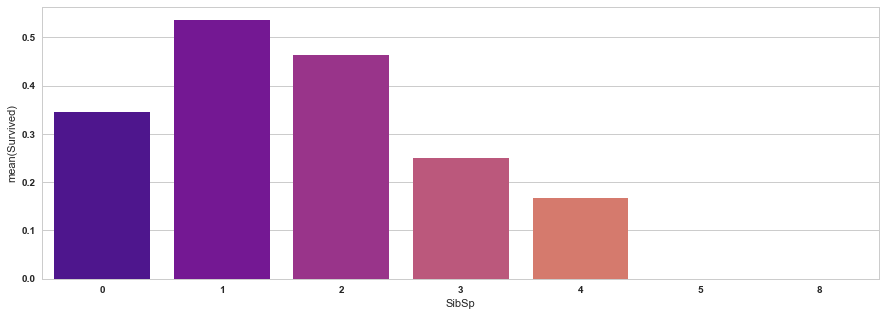

In [63]:
sibsp = titanic_dataset[["SibSp", "Survived"]].groupby(["SibSp"], as_index=False).mean()
print(sibsp.transpose())
plt.subplots(1, figsize=(15,5))
sns.barplot(x="SibSp", y="Survived", data=sibsp, palette="plasma")

                 0         1    2    3    4    5    6
Parch     0.000000  1.000000  2.0  3.0  4.0  5.0  6.0
Survived  0.343658  0.550847  0.5  0.6  0.0  0.2  0.0


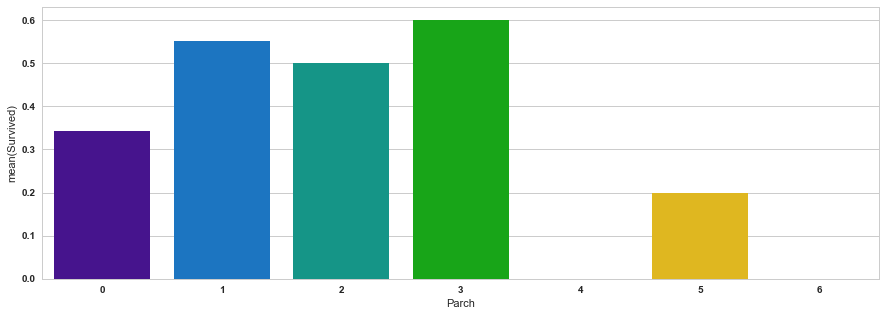

In [64]:
parch = titanic_dataset[["Parch", "Survived"]].groupby(["Parch"], as_index=False).mean()
print(parch.transpose())
plt.subplots(1, figsize=(15,5))
sns.barplot(x="Parch", y="Survived", data=parch, palette="spectral")

In [65]:
SibSp_Val = {}
for i in titanic_dataset["SibSp"]:
    SibSp_Val[i] = SibSp_Val.get(i, 0) + 1

In [66]:
print(SibSp_Val)

{1: 209, 0: 608, 3: 16, 4: 18, 2: 28, 5: 5, 8: 7}


In [67]:
Parch_Val = {}
for i in titanic_dataset["Parch"]:
    Parch_Val[i] = Parch_Val.get(i, 0) + 1
print(Parch_Val)    

{0: 678, 1: 118, 2: 80, 5: 5, 3: 5, 4: 4, 6: 1}


In [68]:
port_of_embarkation = {}
for i in titanic_dataset["Embarked"]:
    port_of_embarkation[i] = port_of_embarkation.get(i, 0) + 1
print(port_of_embarkation)

{'S': 644, 'C': 168, 'Q': 77, nan: 2}


In [69]:
titanic_dataset.groupby(titanic_dataset["Sex"], as_index=False).mean().drop("PassengerId", axis=1)

,Sex,Survived,Pclass,Age,SibSp,Parch,Fare
0,female,0.742038,2.159236,28.289809,0.694268,0.649682,44.479818
1,male,0.188908,2.389948,30.431837,0.429809,0.235702,25.523893


In [70]:
titanic_dataset.groupby(titanic_dataset["Embarked"], as_index=False).mean().drop("PassengerId", axis=1)

,Embarked,Survived,Pclass,Age,SibSp,Parch,Fare
0,C,0.553571,1.886905,30.862619,0.386905,0.363095,59.954144
1,Q,0.389610,2.909091,29.357143,0.428571,0.168831,13.276030
2,S,0.336957,2.350932,29.342780,0.571429,0.413043,27.079812


In [71]:
titanic_dataset.groupby(titanic_dataset["Pclass"], as_index=False).mean().drop("PassengerId", axis=1)

,Pclass,Survived,Age,SibSp,Parch,Fare
0,1,0.629630,37.038981,0.416667,0.356481,84.154687
1,2,0.472826,29.825163,0.402174,0.380435,20.662183
2,3,0.242363,26.382729,0.615071,0.393075,13.675550


In [72]:
titanic_dataset[(titanic_dataset["Age"] > 18) & (titanic_dataset["Age"] < 40) & (titanic_dataset["Survived"] == 1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
17,18,1,2,"Williams, Mr. Charles Eugene",male,38.0,0,0,244373,13.0000,NaN,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,NaN,S
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,39.0,0,0,330959,7.8792,NaN,Q
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,38.0,1,0,PC 17569,146.5208,B78,C


In [73]:
titanic_dataset["Name"][0]

'Braund, Mr. Owen Harris'

In [74]:
print(len(titanic_dataset[(titanic_dataset["SibSp"]==0) & (titanic_dataset["Parch"]==0) & (titanic_dataset["Sex"]=="male")]))

411


In [75]:
Single_travellers = titanic_dataset[(titanic_dataset["SibSp"]==0) & (titanic_dataset["Parch"]==0) & (titanic_dataset["Survived"]==1)]
print("{} Single travellers".format(len(Single_travellers)))

163 Single travellers


In [76]:
Single_male_travellers = titanic_dataset[(titanic_dataset["SibSp"]==0) & (titanic_dataset["Parch"]==0) & (titanic_dataset["Sex"]=="male") & (titanic_dataset["Survived"]==1)]
print("{} Single male travellers".format(len(Single_male_travellers)))

64 Single male travellers


In [77]:
single_female_trvellers = titanic_dataset[(titanic_dataset["SibSp"]==0) & (titanic_dataset["Parch"]==0) & (titanic_dataset["Sex"]=="female") & (titanic_dataset["Survived"]==1)] 
print("{} Single female travellers".format(len(single_female_trvellers)))

99 Single female travellers


In [78]:
pd.crosstab(titanic_dataset["SibSp"], titanic_dataset["Sex"])

Sex,female,male
SibSp,,
0,174,434
1,106,103
2,13,15
3,11,5
4,6,12
5,1,4
8,3,4


In [79]:
pd.crosstab(titanic_dataset["Parch"], titanic_dataset["Sex"], margins=True)

Sex,female,male,All
Parch,,,
0,194,484,678
1,60,58,118
2,49,31,80
3,4,1,5
4,2,2,4
5,4,1,5
6,1,0,1
All,314,577,891


In [80]:
titanic_dataset['CategoricalFare'] = pd.qcut(titanic_dataset['Fare'], 4)
print(titanic_dataset[['CategoricalFare', 'Survived']].groupby(['CategoricalFare'], as_index=False).mean())

  CategoricalFare  Survived
0       [0, 7.91]  0.197309
1  (7.91, 14.454]  0.303571
2    (14.454, 31]  0.454955
3   (31, 512.329]  0.581081


In [81]:
titanic_dataset['Age Group'] = pd.cut(titanic_dataset['Age'], 5)
#print(titanic_dataset[['Age Group', 'Survived']].groupby(['Age Group'], as_index=False).mean())
print(titanic_dataset[['Age Group', 'Survived', "Sex"]].groupby(['Age Group'], as_index=False).mean())

          Age Group  Survived
0    (0.34, 16.336]  0.513514
1  (16.336, 32.252]  0.356659
2  (32.252, 48.168]  0.373541
3  (48.168, 64.084]  0.434783
4      (64.084, 80]  0.090909


In [82]:
for titles in titanic_dataset:
    titanic_dataset["Title"] = titanic_dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    
    
pd.crosstab(titanic_dataset["Title"], titanic_dataset["Survived"])

Survived,0,1
Title,,
Capt,1,0
Col,1,1
Countess,0,1
Don,1,0
Dr,4,3
Jonkheer,1,0
Lady,0,1
Major,1,1
Master,17,23


In [83]:
pd.crosstab(titanic_dataset["Title"], titanic_dataset["Sex"])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [84]:
titanic_dataset.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CategoricalFare,Age Group,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"[0, 7.91]","(16.336, 32.252]",Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(31, 512.329]","(32.252, 48.168]",Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(7.91, 14.454]","(16.336, 32.252]",Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(31, 512.329]","(32.252, 48.168]",Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(7.91, 14.454]","(32.252, 48.168]",Mr


In [85]:
for sirname in titanic_dataset["Name"]:
    if "Heikkinen" in sirname:
        print("Yes")

Yes


In [86]:
titanic_dataset["Name"][(titanic_dataset["SibSp"]==5) & (titanic_dataset["Survived"]==0)]

59     Goodwin, Master. William Frederick
71             Goodwin, Miss. Lillian Amy
386       Goodwin, Master. Sidney Leonard
480        Goodwin, Master. Harold Victor
683           Goodwin, Mr. Charles Edward
Name: Name, dtype: object

In [87]:
titanic_dataset["Name"][titanic_dataset["Age"] < 18].count()

130

In [88]:
print(pd.crosstab(titanic_dataset["Title"], columns=[(titanic_dataset["Age"] < 18)]))    

Age       False  True 
Title                 
Capt          1      0
Col           2      0
Countess      1      0
Don           1      0
Dr            7      0
Jonkheer      1      0
Lady          1      0
Major         2      0
Master        4     36
Miss        128     54
Mlle          2      0
Mme           1      0
Mr          482     35
Mrs         120      5
Ms            1      0
Rev           6      0
Sir           1      0


In [89]:
print(pd.crosstab(titanic_dataset["Title"], columns=[(titanic_dataset["Age"] < 18) & (titanic_dataset["Survived"] == 1)]))    

col_0     False  True 
Title                 
Capt          1      0
Col           2      0
Countess      1      0
Don           1      0
Dr            7      0
Jonkheer      1      0
Lady          1      0
Major         2      0
Master       19     21
Miss        146     36
Mlle          2      0
Mme           1      0
Mr          515      2
Mrs         120      5
Ms            1      0
Rev           6      0
Sir           1      0


In [90]:
pd.crosstab(titanic_dataset["Title"], columns=[(titanic_dataset["Age"] < 18) & (titanic_dataset["Survived"] == 0)])

col_0,False,True
Title,,
Capt,1,0
Col,2,0
Countess,1,0
Don,1,0
Dr,7,0
Jonkheer,1,0
Lady,1,0
Major,2,0
Master,25,15


In [91]:
tab = pd.crosstab((titanic_dataset["Title"],titanic_dataset["Age"]), titanic_dataset["Survived"], margins=True)

In [92]:
print(tab.transpose()["Miss"])

Age       0.75   1.00   2.00   3.00   4.00   5.00   6.00   7.00   8.00   \
Survived                                                                  
0             0      0      4      1      0      0      1      0      1   
1             2      2      2      1      5      4      1      1      1   
All           2      2      6      2      5      4      2      1      2   

Age       9.00   ...    39.00  40.00  41.00  42.00  43.00  45.00  50.00  \
Survived         ...                                                      
0             4  ...        2      0      1      0      1      1      1   
1             0  ...        3      3      1      2      2      0      2   
All           4  ...        5      3      2      2      3      1      3   

Age       54.00  58.00  63.00  
Survived                       
0             0      0      0  
1             1      2      1  
All           1      2      1  

[3 rows x 51 columns]


In [93]:
tab.transpose()

Title    Capt  Col      Countess  Don   Dr                     ...   Mrs   Ms  \
Age      70.0 56.0 60.0     33.0 40.0 23.0 32.0 44.0 49.0 50.0 ...  63.0 28.0   
Survived                                                       ...              
0           1    0    1        0    1    2    0    1    0    0 ...     0    0   
1           0    1    0        1    0    0    1    0    1    1 ...     1    1   
All         1    1    1        1    1    2    1    1    1    1 ...     1    1   

Title     Rev                           Sir  All  
Age      27.0 28.0 42.0 51.0 54.0 57.0 49.0       
Survived                                          
0           1    1    1    1    1    1    0  549  
1           0    0    0    0    0    0    1  342  
All         1    1    1    1    1    1    1  891  

[3 rows x 206 columns]

In [94]:
titanic_dataset[["Title", "Survived"]].groupby("Title").mean()

,Survived
Title,
Capt,0.000000
Col,0.500000
Countess,1.000000
Don,0.000000
Dr,0.428571
Jonkheer,0.000000
Lady,1.000000
Major,0.500000
Master,0.575000


In [95]:
tab

Survived         0    1  All
Title    Age                
Capt     70.0    1    0    1
Col      56.0    0    1    1
         60.0    1    0    1
Countess 33.0    0    1    1
Don      40.0    1    0    1
Dr       23.0    2    0    2
         32.0    0    1    1
         44.0    1    0    1
         49.0    0    1    1
         50.0    0    1    1
         54.0    1    0    1
Jonkheer 38.0    1    0    1
Lady     48.0    0    1    1
Major    45.0    1    0    1
         52.0    0    1    1
Master   0.42    0    1    1
         0.67    0    1    1
         0.83    0    2    2
         0.92    0    1    1
         1.0     2    3    5
         2.0     3    1    4
         3.0     0    4    4
         4.0     3    2    5
         6.0     0    1    1
         7.0     2    0    2
         8.0     1    1    2
         9.0     2    2    4
         10.0    1    0    1
         11.0    1    1    2
         12.0    0    1    1
...            ...  ...  ...
Mrs      40.0    1    3    4
         41.0    2    2    4
         42.0    1    3    4
         43.0    1    1    2
         44.0    1    2    3
         45.0    2    3    5
         47.0    1    1    2
         48.0    1    2    3
         49.0    0    1    1
         50.0    0    2    2
         51.0    0    1    1
         52.0    0    2    2
         53.0    0    1    1
         54.0    0    2    2
         55.0    0    1    1
         56.0    0    1    1
         57.0    1    0    1
         58.0    0    1    1
         60.0    0    1    1
         62.0    0    1    1
         63.0    0    1    1
Ms       28.0    0    1    1
Rev      27.0    1    0    1
         28.0    1    0    1
         42.0    1    0    1
         51.0    1    0    1
         54.0    1    0    1
         57.0    1    0    1
Sir      49.0    0    1    1
All            549  342  891

[206 rows x 3 columns]

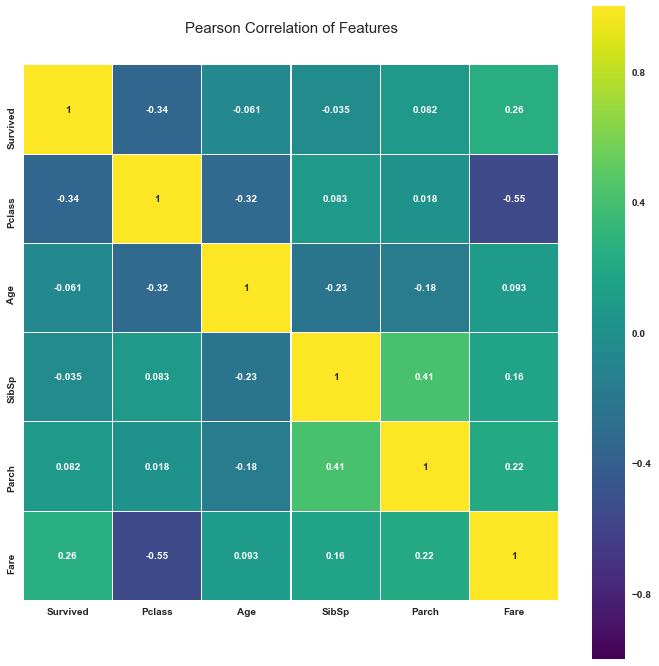

In [96]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(titanic_dataset.drop("PassengerId", axis=1).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

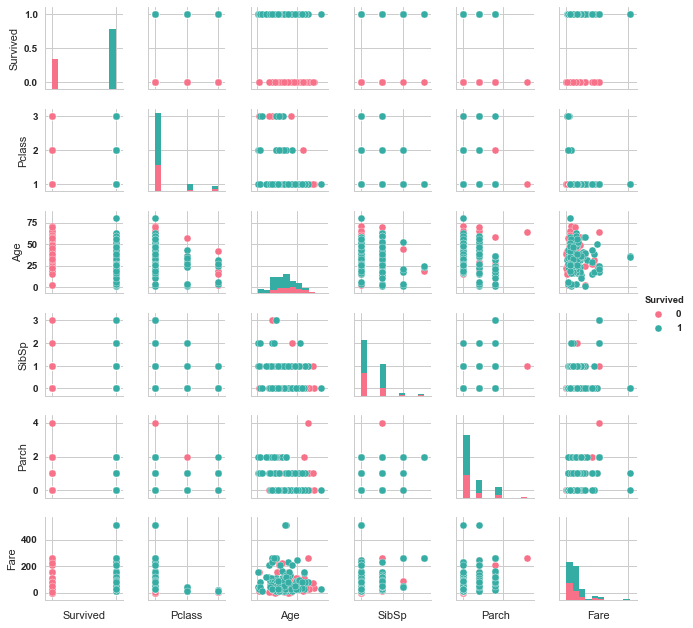

In [97]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
cols = ['Survived','Pclass','Age','SibSp','Parch','Fare']
g = sns.pairplot(data=titanic_dataset.dropna(), vars=cols, size=1.5, hue='Survived', palette='husl')
g.set(xticklabels=[])

In [98]:
gender_survived = pd.crosstab(titanic_dataset["Sex"], titanic_dataset["Survived"])
print(gender_survived)               

Survived    0    1
Sex               
female     81  233
male      468  109


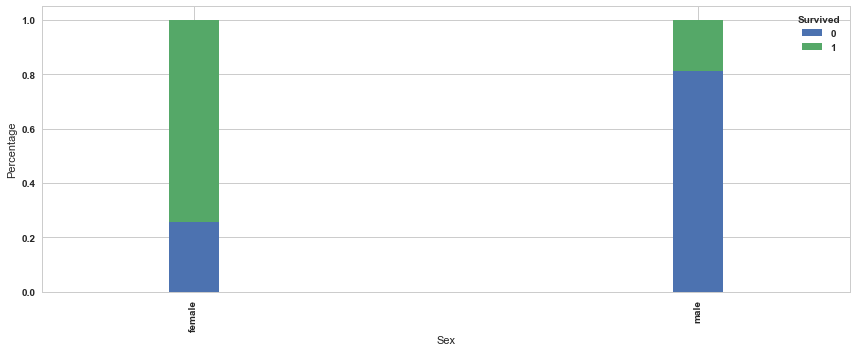

In [99]:
gender_survived.div(gender_survived.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(12, 5), width=.1)
plt.xlabel('Sex')
plt.ylabel('Percentage')
plt.tight_layout()

Number of males 577 
Number of females 314


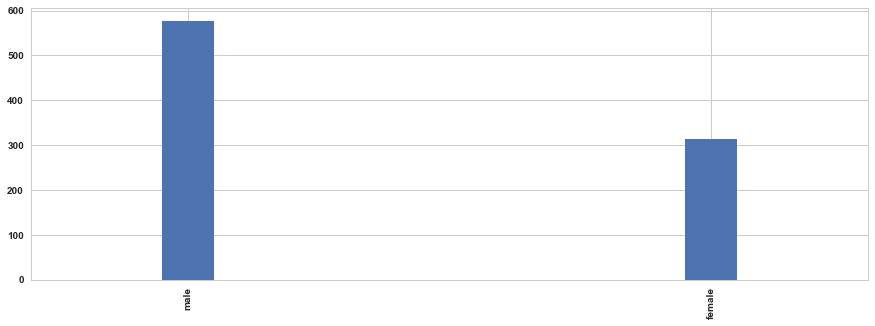

In [103]:
male = titanic_dataset[titanic_dataset["Sex"]=="male"]["Sex"].astype(bool).sum()
female = titanic_dataset[titanic_dataset["Sex"]=="female"]["Sex"].astype(bool).sum()
sex = male,female
series = pd.Series(sex, index=["male", "female"])
print("Number of males {}".format(male),"\n" "Number of females {}".format(female))
series.plot(kind="bar",stacked=False, figsize=(15, 5), width=.1)

In [104]:
gender_survived.div(gender_survived.sum(1).astype(float), axis=0)

Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


In [105]:
#Possible values are: 
#Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, 
#BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, 
#Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, 
#Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, 
#PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, 
#RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, 
#RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, 
#Spectral, Spectral_r, Vega10, Vega10_r, Vega20, Vega20_r, Vega20b, 
#Vega20b_r, Vega20c, Vega20c_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, 
#YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, 
#autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cool, 
#cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, 
#flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, 
#gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, 
#gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, 
#gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, 
#hsv_r, inferno, inferno_r, jet, jet_r, magma, magma_r, nipy_spectral, 
#nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, 
#prism_r, rainbow, rainbow_r, seismic, seismic_r, spectral, spectral_r, 
#spring, spring_r, summer, summer_r, terrain, terrain_r, viridis, 
#viridis_r, winter, winter_r

In [106]:
titanic_dataset[(titanic_dataset["Sex"]=="male") & (titanic_dataset["Survived"]==0)][["Survived", "Sex"]].groupby("Sex").mean()

,Survived
Sex,
male,0


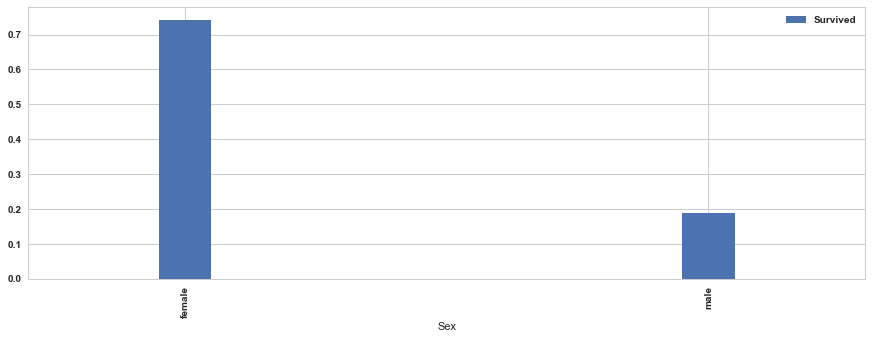

In [107]:
sex = titanic_dataset[["Sex", "Survived"]].groupby("Sex").mean()
sex.plot(kind="bar", stacked=False, figsize=(15, 5), width=.1)

In [108]:
len(titanic_dataset[(titanic_dataset["Sex"]=="male") & (titanic_dataset["Survived"]==0)])

468

In [109]:
len(titanic_dataset[titanic_dataset["Survived"]==0])

549

In [110]:
len(titanic_dataset[titanic_dataset["Survived"]==1])

342

In [111]:
len(titanic_dataset[(titanic_dataset["Sex"]=="male")])

577

In [112]:
len(titanic_dataset[(titanic_dataset["Sex"]=="female")])

314

In [113]:
len(titanic_dataset[(titanic_dataset["Sex"]=="male") & (titanic_dataset["Survived"]==1)])

109

In [114]:
male_survivor_perecent =len(titanic_dataset[(titanic_dataset["Sex"]=="male") & (titanic_dataset["Survived"]==1)])/len(titanic_dataset[(titanic_dataset["Sex"]=="male")])   
male_survivor_perecent

0.18890814558058924

In [115]:
len(titanic_dataset[(titanic_dataset["Sex"]=="female") & (titanic_dataset["Survived"]==1)])

233

In [116]:
female_survivor_perecent = len(titanic_dataset[(titanic_dataset["Sex"]=="female") & (titanic_dataset["Survived"]==1)])/ len(titanic_dataset[(titanic_dataset["Sex"]=="female")])
female_survivor_perecent

0.7420382165605095

      Sex  Survived    Pclass        Age     SibSp     Parch       Fare
0  female  0.742038  2.159236  28.289809  0.694268  0.649682  44.479818

    Sex  Survived    Pclass        Age     SibSp     Parch       Fare
0  male  0.188908  2.389948  30.489029  0.429809  0.235702  25.523893


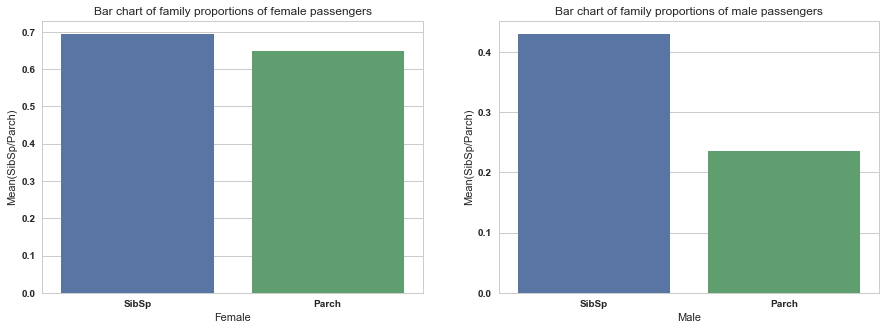

In [117]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5))

fsex = titanic_dataset[titanic_dataset["Sex"]=="female"].groupby(["Sex"], as_index=False).mean()
print(fsex.drop("PassengerId", axis=1))
print()
plt.subplot(axis1)
sns.barplot(data=fsex.drop(["PassengerId", "Pclass", "Survived", "Age", "Fare"], axis=1))
plt.xlabel("Female")
plt.ylabel("Mean(SibSp/Parch)")
plt.title("Bar chart of family proportions of female passengers")


msex = titanic_dataset[titanic_dataset["Sex"]=="male"].groupby(["Sex"], as_index=False).mean()
print(msex.drop("PassengerId", axis=1))
plt.subplot(axis2)
sns.barplot(data=msex.drop(["PassengerId", "Pclass", "Survived", "Age", "Fare"], axis=1))
plt.xlabel('Male')
plt.ylabel('Mean(SibSp/Parch)')
plt.title("Bar chart of family proportions of male passengers")

In [118]:
embarked_survived = titanic_dataset[["Embarked", "Survived"]].groupby(["Embarked"], as_index=False).mean() 

  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957


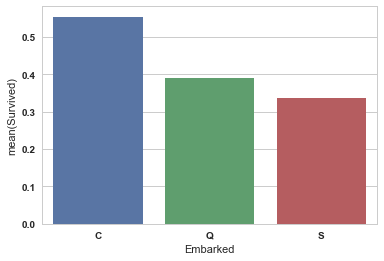

In [119]:
print(embarked_survived)
sns.barplot(x="Embarked", y="Survived", data=embarked_survived)

In [120]:
class_survived = titanic_dataset[["Pclass", "Survived"]].groupby(["Pclass"], as_index=False).mean()

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


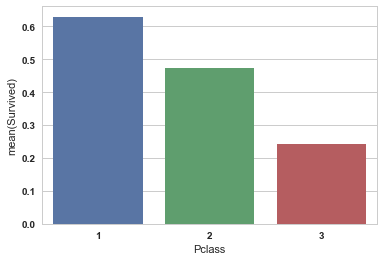

In [121]:
print(class_survived)
sns.barplot(x="Pclass", y="Survived", data=class_survived)

In [122]:
title_survived = pd.crosstab(titanic_dataset["Title"], titanic_dataset["Survived"])

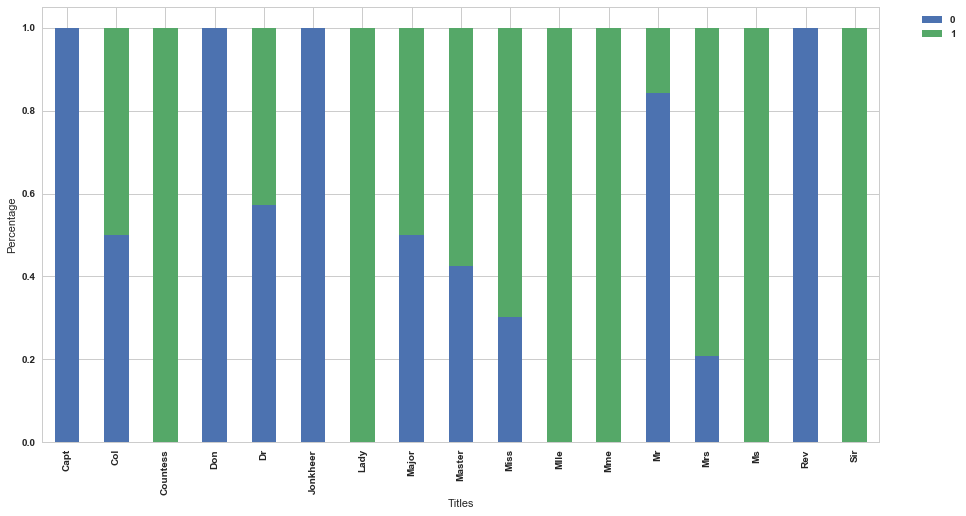

In [123]:
bar = title_survived.div(title_survived.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(15, 8))
plt.xlabel('Titles')
plt.ylabel('Percentage')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

       Title  Survived
0       Capt  0.000000
1        Col  0.500000
2   Countess  1.000000
3        Don  0.000000
4         Dr  0.428571
5   Jonkheer  0.000000
6       Lady  1.000000
7      Major  0.500000
8     Master  0.575000
9       Miss  0.697802
10      Mlle  1.000000
11       Mme  1.000000
12        Mr  0.156673
13       Mrs  0.792000
14        Ms  1.000000
15       Rev  0.000000
16       Sir  1.000000


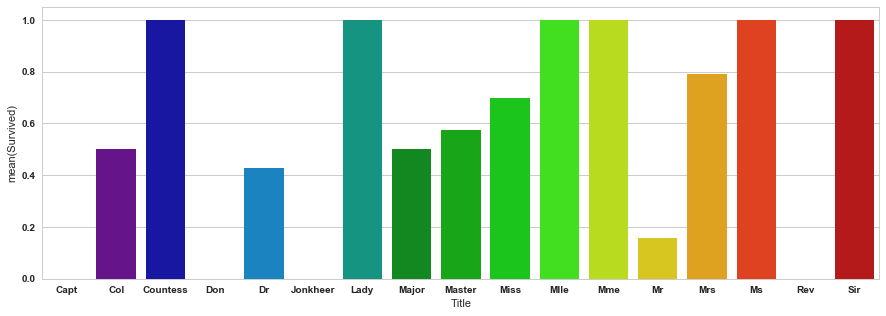

In [147]:
plt.subplots(1, figsize=(15,5))
titles_surv = titanic_dataset[["Title", "Survived"]].groupby(["Title"], as_index=False).mean()
print(titles_surv)
sns.barplot(x="Title", y="Survived",data=titles_surv, palette="spectral")

Sex       female  male  All
Embarked                   
C             73    95  168
Q             36    41   77
S            203   441  644
All          312   577  889


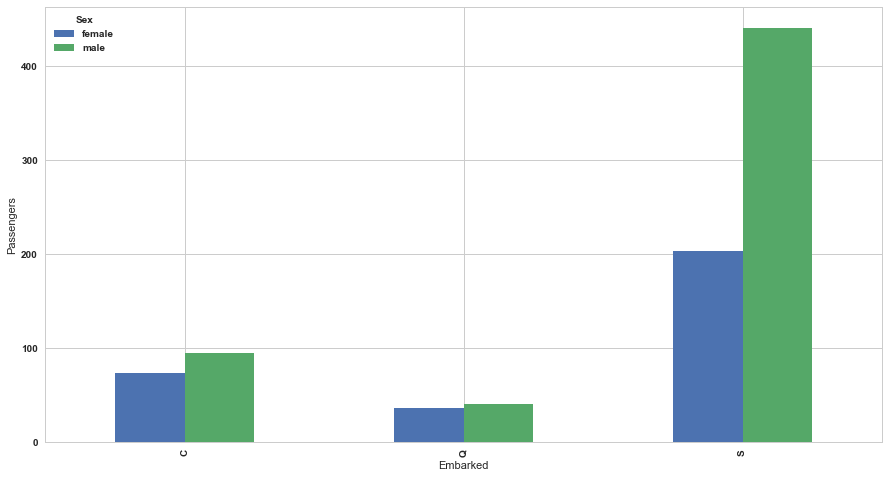

In [150]:
print(pd.crosstab(titanic_dataset["Embarked"], titanic_dataset["Sex"], margins=True))
pd.crosstab(titanic_dataset["Embarked"], titanic_dataset["Sex"]).plot.bar(figsize=(15, 8))
plt.xlabel('Embarked')
plt.ylabel('Passengers')

Sex     female  male  All
Pclass                   
1           94   122  216
2           76   108  184
3          144   347  491
All        314   577  891


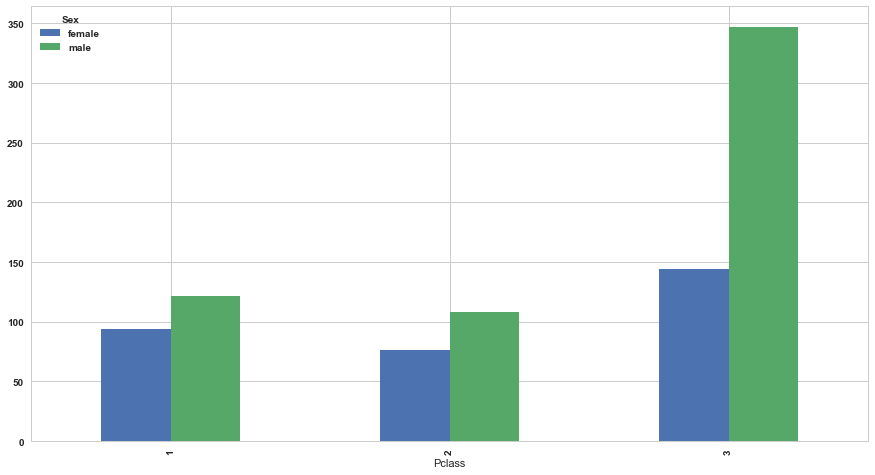

In [126]:
print(pd.crosstab(titanic_dataset["Pclass"], titanic_dataset["Sex"], margins=True))
pd.crosstab(titanic_dataset["Pclass"], titanic_dataset["Sex"]).plot.bar(figsize=(15, 8))

In [1]:
#print(pd.crosstab(titanic_dataset["Age"], titanic_dataset["Survived"]))
pd.crosstab(titanic_dataset["Age"], titanic_dataset["Survived"]).plot.bar(figsize=(20, 12),width=2)

NameError: name 'pd' is not defined

Survived    0    1  All
Sex                    
female     81  233  314
male      468  109  577
All       549  342  891


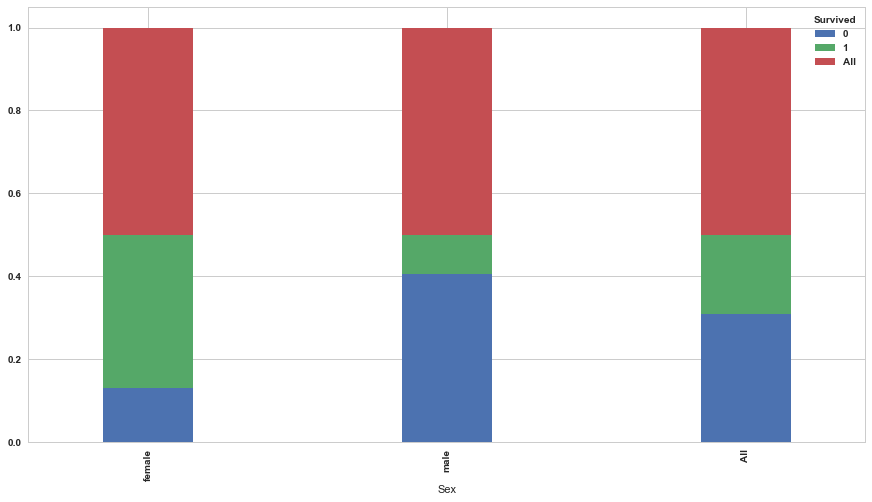

In [128]:
sex_and_surv = pd.crosstab(titanic_dataset["Sex"], titanic_dataset["Survived"], margins=True)
print(pd.crosstab(titanic_dataset["Sex"], titanic_dataset["Survived"], margins=True))
#pd.crosstab(titanic_dataset["Sex"], titanic_dataset["Survived"], margins=True).plot.bar(stacked=True, figsize=(15, 8),width=.3)     
sex_and_surv.div(sex_and_surv.sum(1), axis=0).plot.bar(stacked=True, figsize=(15, 8), width=.3)

In [129]:
title_survived = pd.crosstab(titanic_dataset["Title"], titanic_dataset["Survived"], margins=True)

In [130]:
print(title_survived)

Survived    0    1  All
Title                  
Capt        1    0    1
Col         1    1    2
Countess    0    1    1
Don         1    0    1
Dr          4    3    7
Jonkheer    1    0    1
Lady        0    1    1
Major       1    1    2
Master     17   23   40
Miss       55  127  182
Mlle        0    2    2
Mme         0    1    1
Mr        436   81  517
Mrs        26   99  125
Ms          0    1    1
Rev         6    0    6
Sir         0    1    1
All       549  342  891


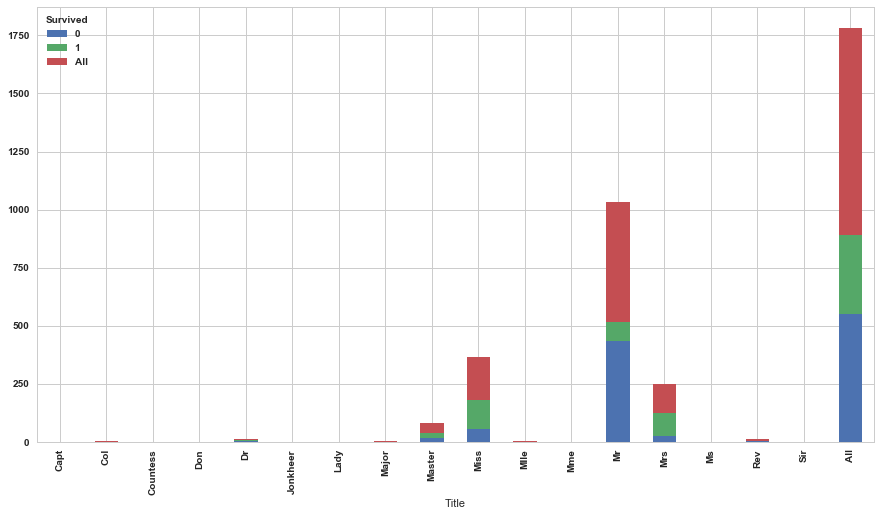

In [131]:
title_survived.plot.bar(stacked=True, figsize=(15, 8))

Pclass        1           2           3       All
Sex      female male female male female male     
Survived                                         
0             3   77      6   91     72  300  549
1            91   45     70   17     72   47  342
All          94  122     76  108    144  347  891


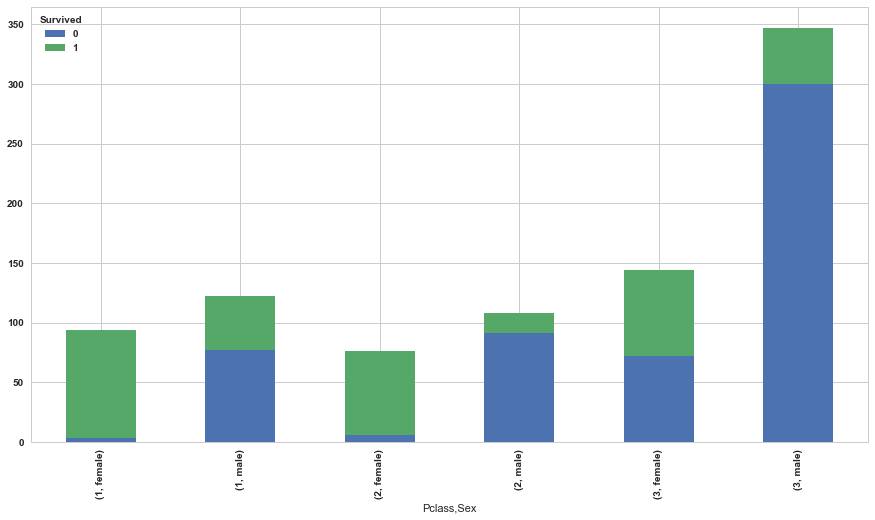

In [132]:
print(pd.crosstab((titanic_dataset["Pclass"], titanic_dataset["Sex"]), titanic_dataset["Survived"], margins=True).transpose())
pd.crosstab((titanic_dataset["Pclass"], titanic_dataset["Sex"]), titanic_dataset["Survived"]).plot.bar(stacked=True,figsize=(15,8))

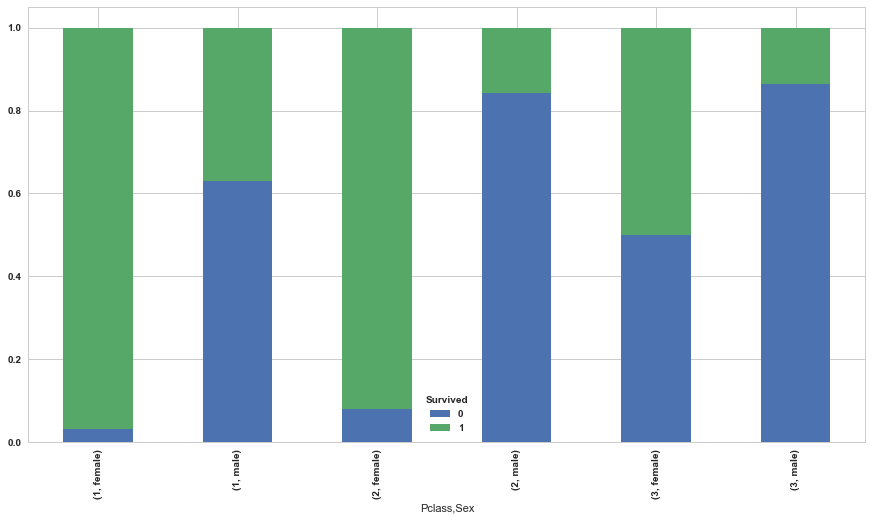

In [133]:
class_and_sex = pd.crosstab((titanic_dataset["Pclass"], titanic_dataset["Sex"]), titanic_dataset["Survived"])   
class_and_sex.div(class_and_sex.sum(1), axis=0).plot.bar(stacked=True,figsize=(15, 8))

Embarked      C           Q           S       All
Sex      female male female male female male     
Survived                                         
0             9   66      9   38     63  364  549
1            64   29     27    3    140   77  340
All          73   95     36   41    203  441  889


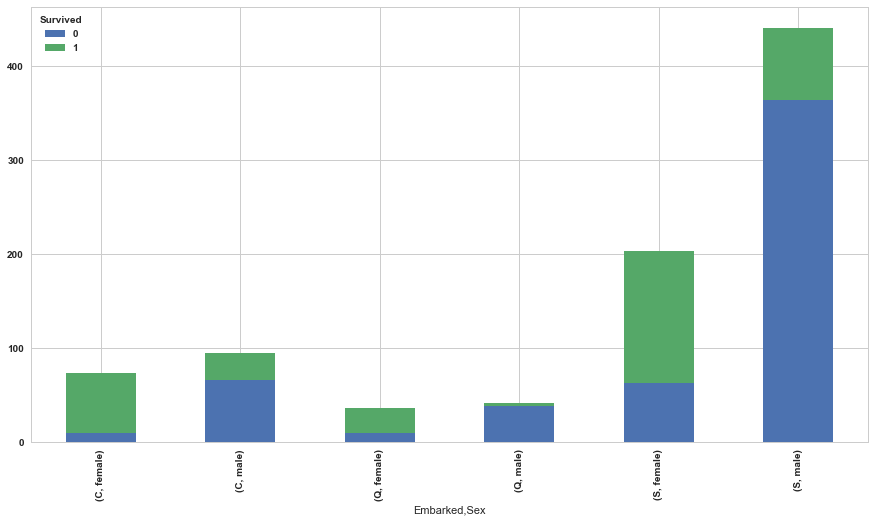

In [134]:
print(pd.crosstab((titanic_dataset["Embarked"], titanic_dataset["Sex"]), titanic_dataset["Survived"], margins=True).transpose())    
pd.crosstab((titanic_dataset["Embarked"], titanic_dataset["Sex"]), titanic_dataset["Survived"]).plot.bar(stacked=True, figsize=(15, 8))

Pclass      1    2    3  All
Embarked                    
C          85   17   66  168
Q           2    3   72   77
S         127  164  353  644
All       214  184  491  889


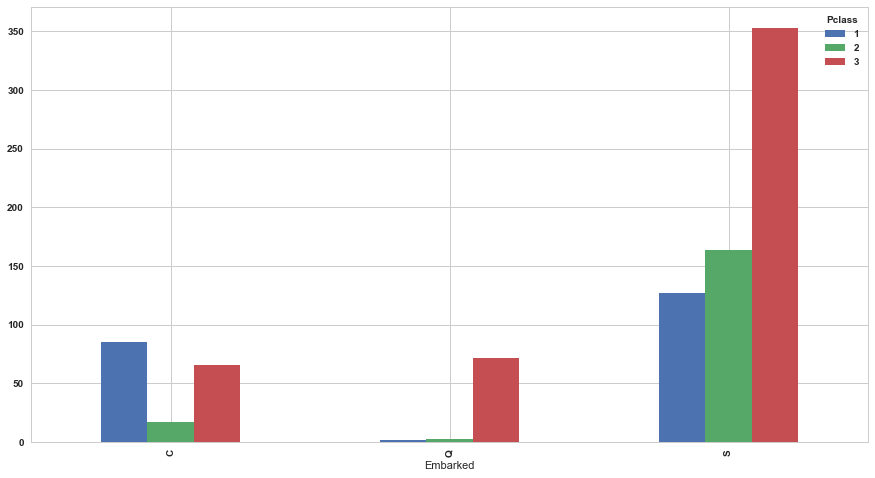

In [135]:
print(pd.crosstab(titanic_dataset["Embarked"], titanic_dataset["Pclass"], margins=True))
pd.crosstab(titanic_dataset["Embarked"], titanic_dataset["Pclass"]).plot.bar(figsize=(15, 8))

In [136]:
#pd.crosstab(titanic_dataset["Pclass"], titanic_dataset["Fare"]).plot.bar(figsize=(15,8))

Survived    0    1
Embarked          
C          75   93
Q          47   30
S         427  217


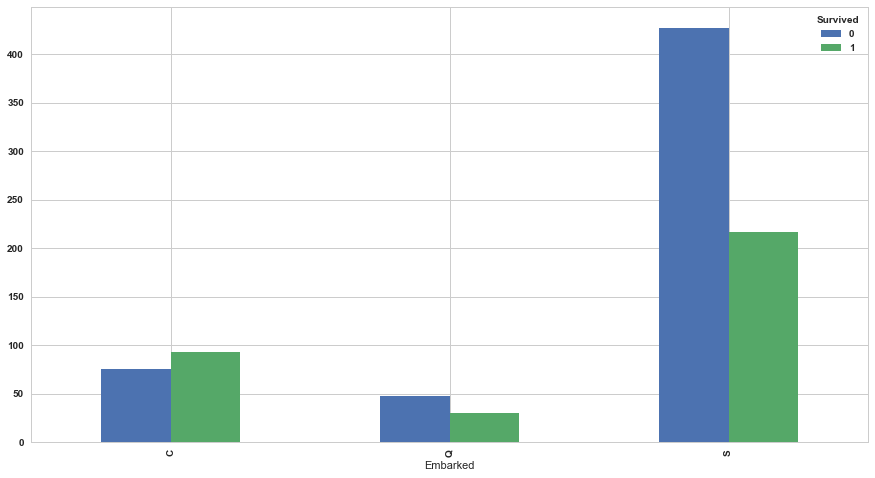

In [137]:
print(pd.crosstab(titanic_dataset["Embarked"], titanic_dataset["Survived"]))
pd.crosstab(titanic_dataset["Embarked"], titanic_dataset["Survived"]).plot.bar(figsize=(15, 8))

  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957


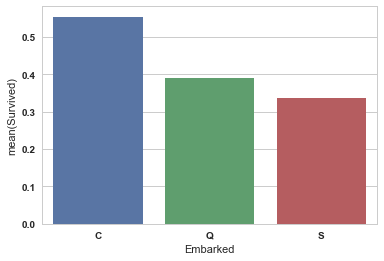

In [138]:
embarked_percentage = titanic_dataset[["Embarked", "Survived"]].groupby(["Embarked"], as_index=False).mean()
print(embarked_percentage)
sns.barplot(x='Embarked', y='Survived', data=embarked_percentage)

Proportionately more males died relative to females. Historically, "women and children first" is a phrase that was first coined on the British HMS Birkenhead, which sunk in 1852. (more info here). Titanic, which also departed from Britain, likely encountered the same informal policy, handed down culturally through the British seas.

To test if there is a statistical difference between the two genders, we conduct a difference in proportions test using a significant level of 0.05 Let p1 be the proportion of male survivals, let p2 be the proportion of female survivals.

H0: p1 = p2

HA: p1 != p2


p = (p1 x n1 + p2 x n2) / (n1 + n2)
  = (0.188908145581 * 577 + 0.742038216561 * 314) / (314 + 577)
  = 0.384
  
SE = sqrt( p * (1-p) * [(1/n1) + (1/n2)] )
   = sqrt( 0.384 * (1-0.384) * [(1/577) + (1/314)] )
   = 0.0341

z = (p1 - p2) / SE
  = (0.188908145581 - 0.742038216561) / 0.0341
  = -16.2
   
CompareMeans.ztest_ind

In [140]:
#CompareMeans.ztest_ind()

In [141]:
male = titanic_dataset[titanic_dataset["Sex"]=="male"]["Sex"].value_counts()
female = titanic_dataset[titanic_dataset["Sex"]=="female"]["Sex"].value_counts()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x126851550>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1269ed518>]], dtype=object)

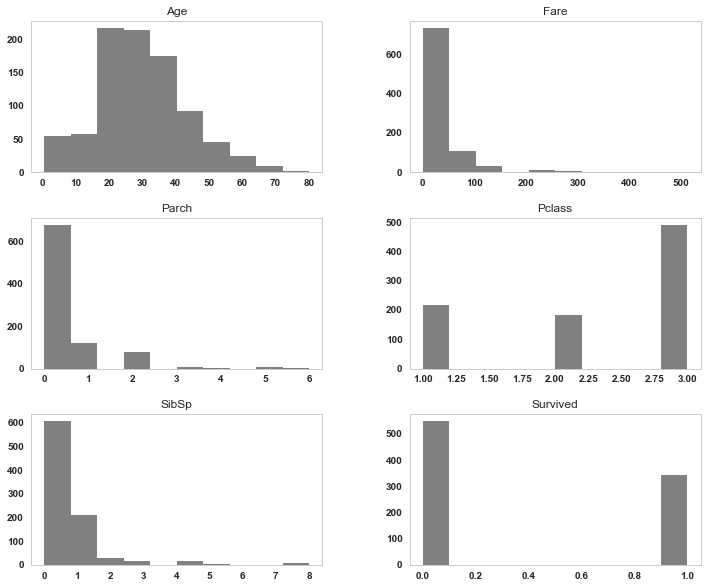

In [142]:
titanic_dataset.drop("PassengerId", axis=1).hist(bins=10,grid=False,figsize=(12, 10), color="gray")

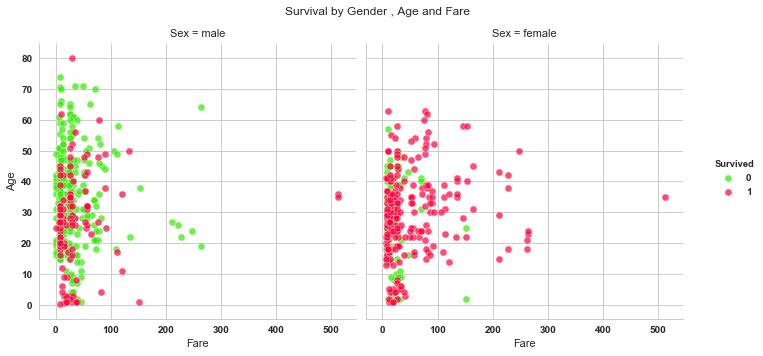

In [143]:
kws = dict(s=50, linewidth=.5, edgecolor="w")
g = sns.FacetGrid(titanic_dataset, hue="Survived", col="Sex", margin_titles=True,
                palette="prism",size=5)
g.map(plt.scatter, "Fare", "Age", alpha=.7, **kws).add_legend()
plt.subplots_adjust(top=0.88)
g.fig.suptitle('Survival by Gender , Age and Fare');

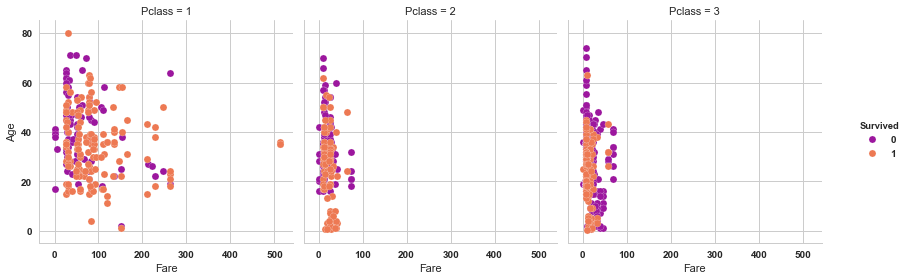

In [144]:
kws = dict(s=50, linewidth=.2, edgecolor="w")
g = sns.FacetGrid(titanic_dataset, hue="Survived", col="Pclass", margin_titles=True,
                  palette="plasma", size=4)
g=g.map(plt.scatter, "Fare", "Age",**kws).add_legend();


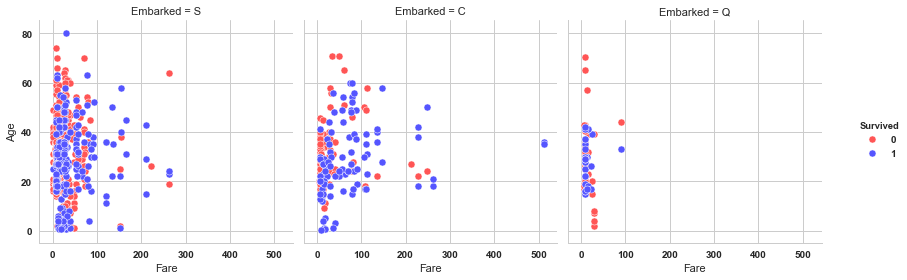

In [145]:
kws = dict(s=50, linewidth=.5, edgecolor="w")
g = sns.FacetGrid(titanic_dataset, hue="Survived", col="Embarked", margin_titles=True,
                  palette="seismic_r", size=4)
g=g.map(plt.scatter, "Fare", "Age",**kws).add_legend();



In [ ]:
#Possible values are: 
#Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, 
#BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, 
#Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, 
#Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, 
#PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, 
#RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, 
#RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, 
#Spectral, Spectral_r, Vega10, Vega10_r, Vega20, Vega20_r, Vega20b, 
#Vega20b_r, Vega20c, Vega20c_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, 
#YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, 
#autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cool, 
#cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, 
#flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, 
#gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, 
#gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, 
#gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, 
#hsv_r, inferno, inferno_r, jet, jet_r, magma, magma_r, nipy_spectral, 
#nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, 
#prism_r, rainbow, rainbow_r, seismic, seismic_r, spectral, spectral_r, 
#spring, spring_r, summer, summer_r, terrain, terrain_r, viridis, 
#viridis_r, winter, winter_r

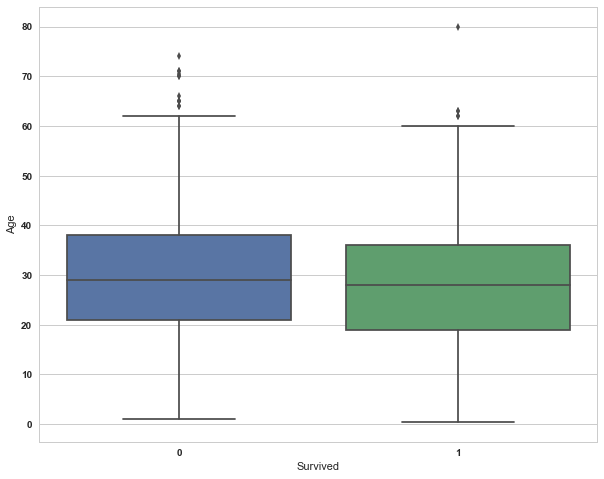

In [146]:
plt.subplots(1,figsize=(10, 8))
ax = sns.boxplot(x="Survived", y="Age", 
                data=titanic_dataset);

In [132]:
from statsmodels.graphics.mosaicplot import mosaic
#mosaic(titanic_dataset, )

In [123]:
age_group = titanic_dataset[['Age Group', 'Survived', "Sex"]].groupby(['Age Group'], as_index=False).mean()

In [124]:
age_group

,Age Group,Survived
0,"(0.34, 16.336]",0.513514
1,"(16.336, 32.252]",0.356659
2,"(32.252, 48.168]",0.373541
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80]",0.090909


In [133]:
#mosaic(titanic_dataset, [titanic_dataset[titanic_dataset["Survived"]==1], "Age Group"])

In [138]:
age_group = pd.crosstab(titanic_dataset["Survived"], titanic_dataset["Age Group"])
age_group

Age Group,"(0.34, 16.336]","(16.336, 32.252]","(32.252, 48.168]","(48.168, 64.084]","(64.084, 80]"
Survived,,,,,
0,54,285,161,39,10
1,57,158,96,30,1


In [141]:
#mosaic(age_group, ["Survived", "Age Group"])